# 8章：ニューラルネット
第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ。  
->今回はPytorchを使う。

## 70. 単語ベクトルの和による特徴量

問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例$x_i$の特徴ベクトル$\boldsymbol{x}_i$を並べた行列$X$と正解ラベルを並べた行列（ベクトル）$Y$を作成したい．

$$
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}
$$


 ここで，$n$は学習データの事例数であり，$\boldsymbol x_i \in \mathbb{R}^d$と$y_i \in \mathbb N$はそれぞれ，$i \in \{1, \dots, n\}$番目の事例の特徴量ベクトルと正解ラベルを表す．
 なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．$\mathbb N_{<4}$で$4$未満の自然数（$0$を含む）を表すことにすれば，任意の事例の正解ラベル$y_i$は$y_i \in \mathbb N_{<4}$で表現できる．
 以降では，ラベルの種類数を$L$で表す（今回の分類タスクでは$L=4$である）．

 $i$番目の事例の特徴ベクトル$\boldsymbol x_i$は，次式で求める．

 $$\boldsymbol x_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t})$$

 ここで，$i$番目の事例は$T_i$個の（記事見出しの）単語列$(w_{i,1}, w_{i,2}, \dots, w_{i,T_i})$から構成され，$\mathrm{emb}(w) \in \mathbb{R}^d$は単語$w$に対応する単語ベクトル（次元数は$d$）である．  
 すなわち，$i$番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものが$\boldsymbol x_i$である．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．$300$次元の単語ベクトルを用いたので，$d=300$である．  
 $i$番目の事例のラベル$y_i$は，次のように定義する．

$$
y_i = \begin{cases}
0 & (\mbox{記事}\boldsymbol x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 & (\mbox{記事}\boldsymbol x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 & (\mbox{記事}\boldsymbol x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 & (\mbox{記事}\boldsymbol x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases}
$$

なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．

以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

 + 学習データの特徴量行列: $X_{\rm train} \in \mathbb{R}^{N_t \times d}$
 + 学習データのラベルベクトル: $Y_{\rm train} \in \mathbb{N}^{N_t}$
 + 検証データの特徴量行列: $X_{\rm valid} \in \mathbb{R}^{N_v \times d}$
 + 検証データのラベルベクトル: $Y_{\rm valid} \in \mathbb{N}^{N_v}$
 + 評価データの特徴量行列: $X_{\rm test} \in \mathbb{R}^{N_e \times d}$
 + 評価データのラベルベクトル: $Y_{\rm test} \in \mathbb{N}^{N_e}$

なお，$N_t, N_v, N_e$はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．

6章の問50と同様の処理を行う。  
データダウンロード後に、データ分割後に保存する。

In [ ]:
## データのダウンロード
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2021-02-12 04:49:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  24.9MB/s    in 1.1s    

2021-02-12 04:49:47 (24.9 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [ ]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [ ]:
## ここは問50と全く一緒
import pandas as pd
from sklearn.model_selection import train_test_split

## データ読み込み
df = pd.read_csv('./newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

## データ抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']),['TITLE', 'CATEGORY']]

## データ分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

## データ保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False )

In [ ]:
## 事例数の確認
print("カテゴリ:(b = business, t = science and technology, e = entertainment, m = health)")
print('---学習データ---')
print(train['CATEGORY'].value_counts())
print('---検証データ---')
print(valid['CATEGORY'].value_counts())
print('---評価データ---')
print(test['CATEGORY'].value_counts())

カテゴリ:(b = business, t = science and technology, e = entertainment, m = health)
---学習データ---
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
---検証データ---
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
---評価データ---
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


In [ ]:
df = pd.concat([train, valid, test], axis=0)
df.reset_index(drop=True, inplace=True)

7章の問60と同様の処理を行う。以下7章問60  
>Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

学習済み単語ベクトルをダウンロードして、ロードする。

In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-02-12 04:49:51--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.102.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.102.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  79.1MB/s    in 17s     

2021-02-12 04:50:08 (91.0 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



Genismを用いて単語ベクトルを読み込む。

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)


読み込んだ後は、ベクトル化したい単語を指定するだけで簡単に単語ベクトルを得ることができる。

In [ ]:
model['Apple'][:5]

array([-0.17480469,  0.0300293 , -0.21679688,  0.15625   , -0.35742188],
      dtype=float32)

word2vecを用いることで単語の類義語や単語間や文章間の類義度を計ることができる。  
以下に「Apple」の類義語を示す。

In [ ]:
model.most_similar('Apple', topn=5)

[('Apple_AAPL', 0.7456985712051392),
 ('Apple_Nasdaq_AAPL', 0.7300410270690918),
 ('Apple_NASDAQ_AAPL', 0.7175089716911316),
 ('Apple_Computer', 0.7145973443984985),
 ('iPhone', 0.6924266219139099)]

後にGPUで学習するためPytorchを使用する。  
そのため、Tensor型に変換する。
### PythorchのTensor型について
numpyのndarray型ととても似ている。  
Tensor型を使うと嬉しい点
- GPUを利用できる
- 勾配情報を簡単に求められる

以下にTensor型の練習コードを書く



In [ ]:
import torch

In [ ]:
## GPUを利用できる
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
c = torch.zeros([4], device=device)
print(c)

tensor([0., 0., 0., 0.], device='cuda:0')


In [ ]:
## 勾配情報を簡単に求められる
x = torch.tensor(5.0, requires_grad=True)
y = 10*x + 20
y.backward()

print(y)
print(x)
print(x.grad)

tensor(70., grad_fn=<AddBackward0>)
tensor(5., requires_grad=True)
tensor(10.)


特徴ベクトルをTensor型で作成する。
特徴ベクトルの以下の通り。（再掲）

 $i$番目の事例の特徴ベクトル$\boldsymbol x_i$

 $$\boldsymbol x_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t})$$

$T_i$：単語列の長さ  
$(w_{i,1}, w_{i,2}, \dots, w_{i,T_i})$：単語列  
$\mathrm{emb}(w) \in \mathbb{R}^d$：単語ベクトル  
$d$：単語$w$に対応する単語ベクトル（次元数）

In [ ]:
import string

def make_w2v(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  ## 記号をスペースに置換する → スペースで分割してリスト化
  words = text.translate(table).split()

  ## [単語1, 単語2...単語300]それぞれの単語をベクトル化する
  vec = [model[word] for word in words if word in model]

  return torch.tensor((1/len(words))*sum(vec))


In [ ]:
## 特徴ベクトル作成
X_train = torch.stack([make_w2v(text) for text in train['TITLE']])
X_valid = torch.stack([make_w2v(text) for text in valid['TITLE']])
X_test = torch.stack([make_w2v(text) for text in test['TITLE']])

In [ ]:
print(X_train.size())
print(X_train[0:5])
print(X_valid.size())
print(X_valid[0:5])

torch.Size([10684, 300])
tensor([[ 0.0837,  0.0056,  0.0068,  ...,  0.0751,  0.0433, -0.0868],
        [ 0.0242,  0.0236, -0.0842,  ..., -0.0930, -0.0435, -0.0082],
        [ 0.0577, -0.0159, -0.0780,  ..., -0.0421,  0.1229,  0.0876],
        [-0.0555,  0.0496,  0.0620,  ..., -0.0136,  0.0390, -0.0206],
        [-0.0259,  0.0775, -0.0256,  ..., -0.0364,  0.1126,  0.0063]])
torch.Size([1336, 300])
tensor([[-0.0264,  0.1098,  0.0382,  ...,  0.0056,  0.0513,  0.1587],
        [ 0.0712,  0.1152, -0.0822,  ..., -0.0151,  0.0091,  0.0217],
        [-0.0058,  0.0320, -0.0094,  ...,  0.0195,  0.0591,  0.0504],
        [-0.0187,  0.0179,  0.1041,  ..., -0.0404,  0.1052, -0.0224],
        [ 0.0134,  0.0070,  0.0432,  ...,  0.0462,  0.0857, -0.0158]])


次にラベルベクトルを作成する。  
以下に$i$番目の事例のラベル$y_i$の定義を示す（再掲）

$$
y_i = \begin{cases}
0 & (\mbox{記事}\boldsymbol x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 & (\mbox{記事}\boldsymbol x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 & (\mbox{記事}\boldsymbol x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 & (\mbox{記事}\boldsymbol x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases}
$$

In [ ]:
label_dic ={'b':0, 't':1, 'e':2, 'm':3}
y_train = torch.tensor([label_dic[label] for label in train['CATEGORY']])
y_valid = torch.tensor([label_dic[label] for label in valid['CATEGORY']])
y_test =  torch.tensor([label_dic[label] for label in test['CATEGORY']])


In [ ]:
print(y_train.size())
print(y_train[0:5])
print(y_valid.size())
print(y_valid[0:5])

torch.Size([10684])
tensor([0, 1, 3, 2, 0])
torch.Size([1336])
tensor([1, 2, 0, 0, 0])


In [ ]:
## 保存
torch.save(X_train, 'X_train.pt')
torch.save(X_valid, 'X_valid.pt')
torch.save(X_test, 'X_test.pt')
torch.save(y_train, 'y_train.pt')
torch.save(y_valid, 'y_valid.pt')
torch.save(y_test, 'y_test.pt')

## 71. 単層ニューラルネットワークによる予測
問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．

$$ 
\hat{y}_1=softmax(x_1W),\\\hat{Y}=softmax(X_{[1:4]}W)
$$


ただし，$softmax$はソフトマックス関数，$X_{[1:4]}∈\mathbb{R}^{4×d}$は特徴ベクトル$x_1$,$x_2$,$x_3$,$x_4$を縦に並べた行列である．

$$
X_{[1:4]}=\begin{pmatrix}x_1\\x_2\\x_3\\x_4\end{pmatrix}
$$

行列$W \in \mathbb{R}^{d \times L}$は単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．  
なお，$\hat{\boldsymbol y_1} \in \mathbb{R}^L$は未学習の行列$W$で事例$x_1$を分類したときに，各カテゴリに属する確率を表すベクトルである．
同様に，$\hat{Y} \in \mathbb{R}^{n \times L}$は，学習データの事例$x_1, x_2, x_3, x_4$について，各カテゴリに属する確率を行列として表現している．


In [ ]:
len(X_train)

10684

In [ ]:
import torch.nn as nn

In [ ]:
INPUT_FEATURES = 300  # 入力（特徴）の数： 300
OUTPUT_NEURONS = 4  # ニューロンの数： 4

## torch.nn.Moduleクラスを継承する
class Net(nn.Module):
  def __init__(self, input_features, output_neurons):
    super(Net, self).__init__()
    ## 層（layer）を定義
    self.layer = nn.Linear(input_features, output_neurons, bias=False) #Linearは「全結合層」を指す
    nn.init.normal_(self.layer.weight, 0.0, 1.0) # 正規乱数で重み初期化

  ## フォワードパスを定義
  def forward(self, input):
    output = self.layer(input)
    ##　層を重ねる場合は「出力：output」を次の層の「入力：input」に使う。
    return output


In [ ]:
X_train

tensor([[ 0.0837,  0.0056,  0.0068,  ...,  0.0751,  0.0433, -0.0868],
        [ 0.0242,  0.0236, -0.0842,  ..., -0.0930, -0.0435, -0.0082],
        [ 0.0577, -0.0159, -0.0780,  ..., -0.0421,  0.1229,  0.0876],
        ...,
        [ 0.0392, -0.0052,  0.0686,  ..., -0.0175,  0.0061, -0.0224],
        [ 0.0798,  0.1017,  0.1066,  ..., -0.0752,  0.0623,  0.1138],
        [ 0.1664,  0.0451,  0.0508,  ..., -0.0531, -0.0183, -0.0039]])

In [ ]:
model = Net(INPUT_FEATURES, OUTPUT_NEURONS)
print(model)
y_hat_1 = torch.softmax(model(X_train[:1]), dim=-1)
print(y_hat_1)
Y_hat = torch.softmax(model(X_train[:4]), dim=-1)
print(Y_hat)

Net(
  (layer): Linear(in_features=300, out_features=4, bias=False)
)
tensor([[0.1052, 0.3519, 0.4902, 0.0527]], grad_fn=<SoftmaxBackward>)
tensor([[0.1052, 0.3519, 0.4902, 0.0527],
        [0.0059, 0.0065, 0.9772, 0.0104],
        [0.1238, 0.5615, 0.2738, 0.0409],
        [0.6085, 0.1306, 0.2243, 0.0366]], grad_fn=<SoftmaxBackward>)


[memo]   
`output = model(input)`　と　`output = model.forward(input)`が同じ動作をするのはなぜか?  
→nn.Moduleのインスタンスは呼び出し可能オブジェクトであり、`__call__`が実装されているため
```
model = Net() 
output = model(input)
```
つまりこのとき、Netのインスタンスであるmodelは呼び出し可能オブジェクトになっている。このときの`__call__`関数内で`forward()`を呼び出している。


## 72. 損失と勾配の計算

学習データの事例x1
と事例集合x1,x2,x3,x4
に対して，クロスエントロピー損失と，行列W
に対する勾配を計算せよ．なお，ある事例xi
に対して損失は次式で計算される．

$$
l_i=−log[事例x_iがy_iに分類される確率]
$$

ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．

### クロスエントロピーについて
わかりやすい記事を見つけたので、そこから以下に引用した。  
[交差エントロピー誤差をわかりやすく説明してみる](https://qiita.com/kenta1984/items/59a9ef1788e6934fd962)

以下引用

> ### 式
交差エントロピー誤差を式で表現すると次のようになります。なお、この$log$は自然対数（底が$e$）です。
$$
H(p, q) = -\sum_{x} p(x) log(q(x))
$$
$p$は真の確率分布、$q$は推定した確率分布です。
$p$と$q$の確率分布が似ていると交差エントロピー誤差は小さくなり、似ていないと交差エントロピー誤差は大きくなります。
ただ、式だけだといまいちイメージが付きませんよね…。
> ### 例
式だけだとわかりにくいので、わかりやすいように例をあげます。
今、写真に映っている果物が、
>- バナナ
- りんご
- みかん

>のどれかを予測するとします。  
写真に映っている果物がバナナの場合、真の確率分布$p$は`(1, 0, 0)`となります。
そして、推定した確率分布$q$が`(0.8, 0.1, 0.1)`だったとします。
この場合、交差エントロピー誤差は次のようになります。
$$
\begin{align}
H(p, q)& = -(1*log0.8 + 0*log0.1 + 0*log0.1) \\
& = -(log0.8) \\
& = -(-0.09) \\
& = 0.09
\end{align}
$$
一方、推定した確率分布$q(x)$が`(0.3, 0.4, 0.3)`だったとします。
この場合、交差エントロピー誤差は次のようになります。
$$
\begin{align}
H(p, q)& = -(1*log0.3 + 0*log0.4 + 0*log0.3) \\
& = -(log0.3) \\
& = -(-0.52) \\
& = 0.52
\end{align}
$$
交差エントロピー誤差は後者よりも前者の方が小さくなっており、真の確率分布$p$に近いのは前者の確率分布$q$であることが分かります。
直感とも一致するので、交差エントロピー誤差が損失関数として適していることが分かります。


pytorch のCrossEntropyLoss()を用いてクロスエントロピー損失を求める。  
CrossEntropy(入力, 正解)で損失を計算できる。

In [ ]:
loss = nn.CrossEntropyLoss()
l = loss(model(X_train[:4]), y_train[:4])
print("損失 : ",l.item())

損失 :  2.993868112564087


次に勾配の計算を行う。  
勾配はTensor型であれば、backward()で計算できる。  
計算した勾配はNewworkのパラメータ情報（model.xxx.weight）が持っている。  

In [ ]:
model.zero_grad() #勾配情報をゼロ初期化
l.backward()
print("勾配 : ", model.layer.weight.grad)

勾配 :  tensor([[-2.5344e-02,  5.8287e-03,  5.3715e-03,  ..., -2.0316e-02,
         -1.6619e-05,  1.8979e-02],
        [ 7.6370e-03, -5.9737e-03,  1.2591e-02,  ...,  2.3358e-02,
          3.3134e-02,  6.0294e-03],
        [ 3.0877e-02, -4.2492e-03, -3.7091e-02,  ..., -1.3750e-02,
         -4.4632e-03, -2.6385e-03],
        [-1.3170e-02,  4.3942e-03,  1.9129e-02,  ...,  1.0709e-02,
         -2.8654e-02, -2.2370e-02]])


## 73. 確率的勾配降下法による学習

確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列W
を学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．

### 勾配降下法について
関数の傾きを用いて誤差の最小な値（最適解）を探すこと。  
#### バッチ勾配降下法
簡単な線形予測モデルとして、説明変数（特徴量） x にあるパラメーター w をかけることによって、目的変数 y を予測するモデルと仮定する。
$$ y = wx $$

予測性能のよいモデルとは、予測値と真の値の誤差を最小にするモデルである。つまり、学習データをモデルに代入して予測した $\hat{y}$
 は、実際の真の値である y1, ..., yn との差がもっとも小さくなるようなモデルである。ここで、予測値と真の値の平均二乗誤差を損失関数 L として定義する。このとき、損失関数 L は次のようにかける。
$$L=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2=\frac{1}{n}\sum_{i=1}^{n}(y_i-wx_i)^2$$

ここで誤差Lを最小化するために重み$w$を変化させる。  
仮に$w=w^{(0)}$のときが最小かどうかを調べるためには、損失関数 L を w = w(0) の位置で微分して、その 1 次導関数を調べる。  
このとき$L'(w^{(0)})=0$ならば最小値と言える。
もし、$L'(w^{(0)})<0$ならば、以下の図のように右側に最小値があり、逆に$L'(w^{(0)})>0$ならば左側に最小値がある。  
図の場合、$L'(w^{(0)})<0$であるため、最小値の探索のために少し右に移動した$L'(w^{(1)})$を調べている。
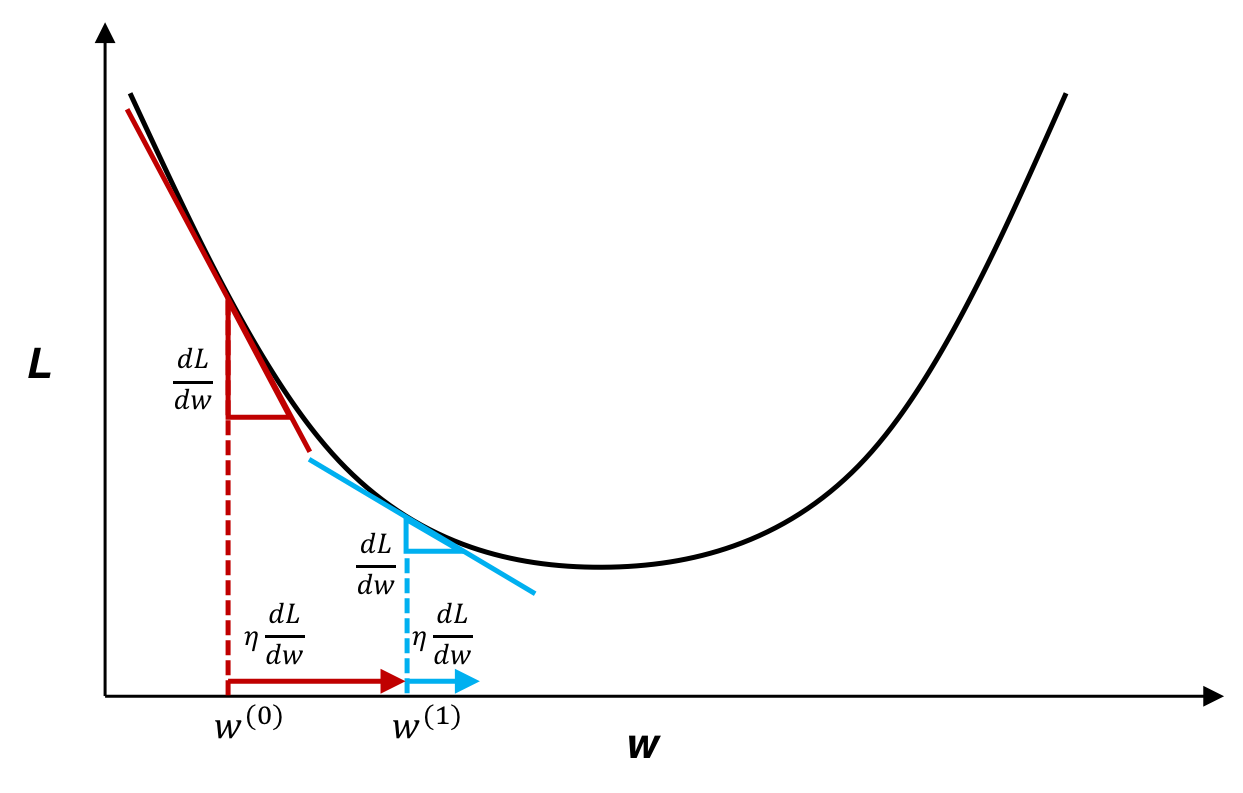





このことを数式化すると以下の通り。
$$ w^{(j+1)} =  w^{(j)} - \left. \eta \frac{dL}{dw}\right|_{w=w^{(j)} } $$

$\eta(0<\eta<1)$は学習率と呼ぶ。どれくらいのステップで$w$を移動されるかのパラメータである。$\eta$が小さいほど学習に時間がかかる。

このようにして、誤差Lを最小にするために$w$を変化させて最適な重み$w$に近づけることを学習と呼ぶ。


#### バッチ勾配降下法の問題点
上図で示したようにバッチ勾配降下法では全てのデータを用いて、誤差の損失を算出している。  
そのため、データ数が膨大である場合はそれら全てをメモリ上に読み込む必要がある。また、パラメータを更新するたびに、全てのデータをに対して再度損失を計算し直す必要がある。  
このようにバッチ勾配降下法は、計算リソースと計算コストが非常にかかるアルゴリズムとなっている。また、学習データを新しく追加した場合、古い学習データと新しい学習データをまとめてもう一度学習させる必要がある。  

また、バッチ勾配降下法には初期値依存問題がある。
以下に示した図のようにパラメータが複数ある場合、損失関数の形は複数のパラメータによって支配され、複雑な形となる。中には複数の極小値を持つ損失関数も存在する。  
このとき、パラメータの初期値と学習率の決め方によって、最小値（最適解）ではなく、極小値（局所的最適解）にたどり着く場合がある。  
そして、一度極小値にたどり着くと、勾配が0として、それ以上学習しなくなる。  
したがって、バッチ勾配降下法は局所的最適解に陥りやすいと言われている。
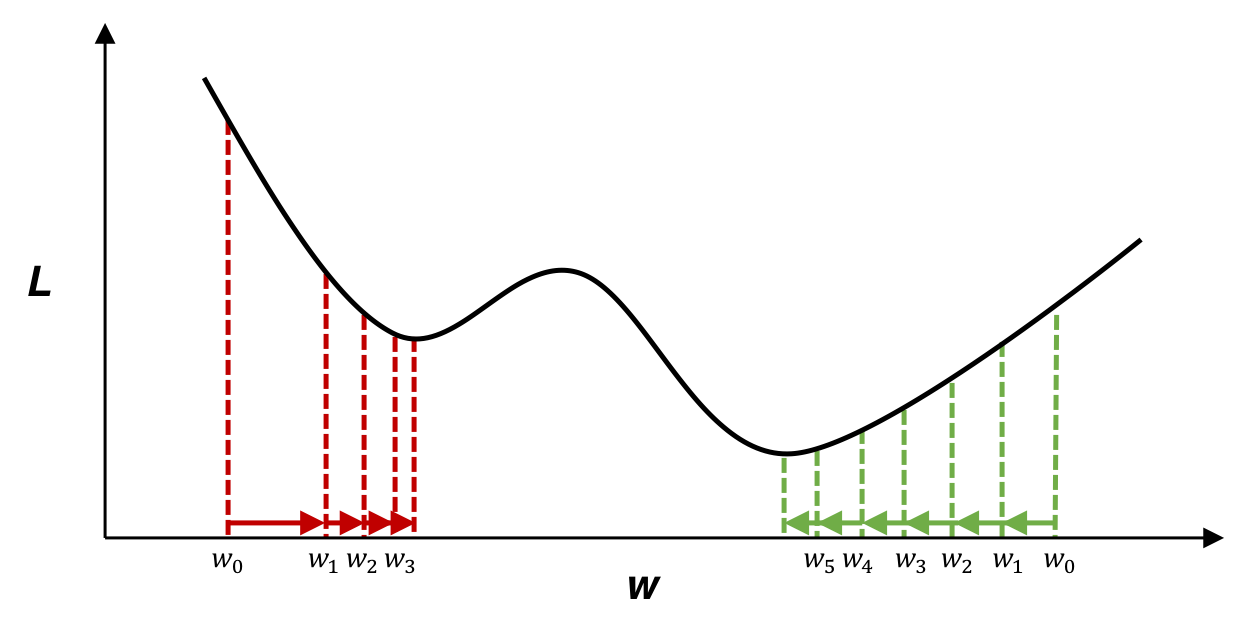



#### 確率的勾配降下法
バッチ勾配降下法が局所的最適解に陥りやすいのに対して、確率的勾配降下法は最小の最適解が得やすい。  
確率的勾配降下法は、**全学習データをランダムにソート**し、その中からランダムに 1 つ（例えば、(xp, yp)）だけを取り出して損失を計算している。これにより、すべてのデータをメモリ上に読み込む必要がなく、一度に 1 つのデータでしか損失を計算しないので、最急降下法に比べて必要な計算リソースは少なく、計算速度が速い。また、確率的勾配降下法では、（損失を計算するときに、すべてのデータを用いているわけではないので、）学習データが新しく追加されたとき、追加されたデータのみに対して再学習されるだけで十分である。   

このアルゴリズムによって、最急降下法と比較して局所最適解に収束する可能性は少ない。例えば、j 回目の学習において、学習データの p 番目のセット (xp, yp) を使って損失を計算したとき、その損失が損失関数の局所最適解であったとする。  
このとき、損失関数 L の 1 次導関数は 0 になり、w (j+1) は次のように更新される（つまり、更新されていない）。
$$ w^{(j+1)} =  w^{(j)} - \left. \eta \frac{dL}{dw}\right|_{w=w^{(j)} } = W^{(j)} $$

そして、次にもう一度学習させるとき、学習データの中から s (≠ p) 番目のセットが選ばれたとする。s 番目の学習データセットを使ったとき、損失関数の 1 次導関数が 0 になるとは限らない（局所的最適解から抜け出す）。このため、学習が再び進むようになる。  
確率的勾配降下法のことをオンライン勾配降下法と言うこともある。

デメリット  
→ミニバッチ法と比べて時間がかかる





PyTorchのDataset, Dataloaderを準備して、学習を行う。  


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
## 自作Datasetクラス
class MyDataset(TensorDataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y
  
  def __len__(self): # len()を定義
    return len(self.y)

  def __getitem__(self, index): # MyDataset[index]の返り値を定義
    return self.X[index], self.y[index]

In [ ]:
## Dataset作成
ds_train = MyDataset(X_train, y_train)
ds_valid = MyDataset(X_valid, y_valid)
ds_test = MyDataset(X_test, y_test)

## DataLoader作成
## 確率的勾配降下法なので学習時のバッチサイズは1
loader_train = DataLoader(ds_train, batch_size=1, shuffle=True)
loader_valid = DataLoader(ds_valid, batch_size=len(y_valid), shuffle=False)
loader_test = DataLoader(ds_test, batch_size=len(y_test), shuffle=False)


損失関数はクロスエントロピー損失を、オプティマイザは確率的勾配降下法を使用。

In [ ]:
import torch.optim as optim

## モデルの定義
INPUT_FEATURES = 300  # 入力（特徴）の数： 300
OUTPUT_NEURONS = 4  # ニューロンの数： 4
model = Net(INPUT_FEATURES, OUTPUT_NEURONS)

## 損失関数の定義（クロスエントロピー損失を使用）
criterion = nn.CrossEntropyLoss()

## オプティマイザの定義（確率的勾配降下法を使用）
op = optim.SGD(model.parameters(), lr=0.1)

## 学習
epochs = 10
for epoch in range(epochs):
  model.train() #訓練モード
  loss_train = 0

  for i,(inputs,labels) in enumerate(loader_train):
    op.zero_grad() # 勾配ゼロ初期化
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    op.step()

    loss_train += loss.item()
  
  ## 学習データ平均損失
  loss_train /= i 

  ## 以下検証データ損失計算
  model.eval()
  with torch.no_grad(): #勾配計算を無効
    inputs, labels = next(iter(loader_valid))
    outputs = model(inputs)
    loss_valid = criterion(outputs, labels)

  print(f'エポック数 : {epoch+1}, 学習データの平均損失 : {loss_train:.4f}, 検証データの損失{loss_valid:.4f}') 


エポック数 : 1, 学習データの平均損失 : 0.4771, 検証データの損失0.3671
エポック数 : 2, 学習データの平均損失 : 0.3159, 検証データの損失0.3342
エポック数 : 3, 学習データの平均損失 : 0.2861, 検証データの損失0.3219
エポック数 : 4, 学習データの平均損失 : 0.2701, 検証データの損失0.3156
エポック数 : 5, 学習データの平均損失 : 0.2600, 検証データの損失0.3129
エポック数 : 6, 学習データの平均損失 : 0.2527, 検証データの損失0.3090
エポック数 : 7, 学習データの平均損失 : 0.2466, 検証データの損失0.3100
エポック数 : 8, 学習データの平均損失 : 0.2421, 検証データの損失0.3079
エポック数 : 9, 学習データの平均損失 : 0.2386, 検証データの損失0.3068
エポック数 : 10, 学習データの平均損失 : 0.2357, 検証データの損失0.3069


[memo]model.train(), model.eval()と切り替えているのは、dropout層やbacthNormalization層は学習時のみに使用されるため、これらの使用を明示的に切り替えるため。

## 74. 正解率の計測

問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．

正答率を算出する関数を作成する。引数は（学習済みモデル, Dataloader）で、返り値は正答率とする。

$i$番目の事例のラベル$y_i$は，次のように定義されている。
$$
y_i = \begin{cases}
0 & (\mbox{記事}\boldsymbol x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 & (\mbox{記事}\boldsymbol x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 & (\mbox{記事}\boldsymbol x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 & (\mbox{記事}\boldsymbol x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases}
$$
したがって、outputsの最大値のindexが予測値とみなせる。（torch.argmax関数を使用）

In [ ]:
def accuracy_score(model, loader):
  model.eval()
  total = 0
  correct = 0

  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)
      correct += (pred == labels).sum().item()
      total += len(inputs)
  
  return correct / total

In [ ]:
acc_train = accuracy_score(model, loader_train)
acc_test = accuracy_score(model, loader_test)

In [ ]:
print(f'正解率（学習データ）：{acc_train:.4f}')
print(f'正解率（テストデータ）：{acc_test:.4f}')

正解率（学習データ）：0.9239
正解率（テストデータ）：0.8975


## 75. 損失と正解率のプロット
問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

In [ ]:
## モデルの定義
INPUT_FEATURES = 300  # 入力（特徴）の数： 300
OUTPUT_NEURONS = 4  # ニューロンの数： 4
model = Net(INPUT_FEATURES, OUTPUT_NEURONS)

## 損失関数の定義（クロスエントロピー損失を使用）
criterion = nn.CrossEntropyLoss()

## オプティマイザの定義（確率的勾配降下法を使用）
op = optim.SGD(model.parameters(), lr=0.1)

## 記録変数history
history = {}
history['train_loss_values'] = []
history['train_accuracy_values'] = []
history['valid_loss_values'] = []
history['valid_accuracy_values'] = []

## 学習
epochs = 10
for epoch in range(epochs):
  model.train() #訓練モード
  loss_train = 0

  for i,(inputs,labels) in enumerate(loader_train):
    op.zero_grad() # 勾配ゼロ初期化
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    op.step()

    loss_train += loss.item()
  
  ## 学習データ平均損失
  loss_train /= i 
  history['train_loss_values'].append(loss_train)
  acc_train = accuracy_score(model, loader_train)
  history['train_accuracy_values'].append(acc_train)

  ## 以下検証データ損失計算
  model.eval()
  with torch.no_grad(): #勾配計算を無効
    inputs, labels = next(iter(loader_valid))
    outputs = model(inputs)
    loss_valid = criterion(outputs, labels)
    history['valid_loss_values'].append(loss_valid)
    acc_valid = accuracy_score(model, loader_valid)
    history['valid_accuracy_values'].append(acc_valid)


  print(f'エポック数 : {epoch+1}, 学習データの平均損失 : {loss_train:.4f}, 検証データの損失{loss_valid:.4f}') 
  print(f'学習データの正答率 : {acc_train:.4f}, 検証データの正答率{acc_valid:.4f}\n') 


エポック数 : 1, 学習データの平均損失 : 0.4606, 検証データの損失0.3560
学習データの正答率 : 0.8849, 検証データの正答率0.8847

エポック数 : 2, 学習データの平均損失 : 0.3172, 検証データの損失0.3258
学習データの正答率 : 0.9010, 検証データの正答率0.8862

エポック数 : 3, 学習データの平均損失 : 0.2869, 検証データの損失0.3214
学習データの正答率 : 0.9056, 検証データの正答率0.8892

エポック数 : 4, 学習データの平均損失 : 0.2719, 検証データの損失0.3068
学習データの正答率 : 0.9154, 検証データの正答率0.8975

エポック数 : 5, 学習データの平均損失 : 0.2610, 検証データの損失0.3044
学習データの正答率 : 0.9168, 検証データの正答率0.8945

エポック数 : 6, 学習データの平均損失 : 0.2526, 検証データの損失0.3043
学習データの正答率 : 0.9187, 検証データの正答率0.9004

エポック数 : 7, 学習データの平均損失 : 0.2470, 検証データの損失0.3004
学習データの正答率 : 0.9209, 検証データの正答率0.8975

エポック数 : 8, 学習データの平均損失 : 0.2422, 検証データの損失0.3041
学習データの正答率 : 0.9204, 検証データの正答率0.8967

エポック数 : 9, 学習データの平均損失 : 0.2384, 検証データの損失0.3045
学習データの正答率 : 0.9215, 検証データの正答率0.8975

エポック数 : 10, 学習データの平均損失 : 0.2357, 検証データの損失0.3023
学習データの正答率 : 0.9243, 検証データの正答率0.8990



In [ ]:
## グラフ描写関数作成
import matplotlib.pyplot as plt

def plot(values1, values2, rng, label1='', label2='', xlabel='', ylabel=''):
  plt.plot(range(rng), values1, label=label1)
  plt.plot(range(rng), values2, label=label2)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.grid()
  plt.show()

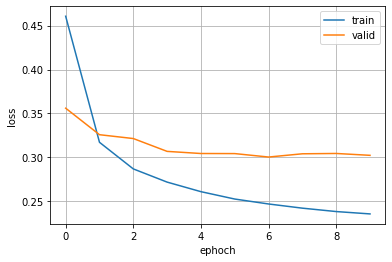

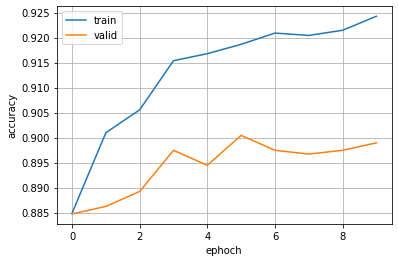

In [ ]:
plot(history['train_loss_values'], history['valid_loss_values'], epochs, 'train', 'valid', 'ephoch', 'loss')
plot(history['train_accuracy_values'], history['valid_accuracy_values'], epochs, 'train', 'valid', 'ephoch', 'accuracy')

## 76. チェックポイント

問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．



基本的にチェックポイントのセーブは`torch.save(dict,'path.pt')`を使用する。  

学習途中のパラメータは`model.state_dict()`、最適化アルゴリズムの内部状態は`optimizer.state_dict()`でアクセス可能なので、各エポックでエポック数と合わせて保存する処理を追加する。

In [ ]:
## モデルの定義
INPUT_FEATURES = 300  # 入力（特徴）の数： 300
OUTPUT_NEURONS = 4  # ニューロンの数： 4
model = Net(INPUT_FEATURES, OUTPUT_NEURONS)

## 損失関数の定義（クロスエントロピー損失を使用）
criterion = nn.CrossEntropyLoss()

## オプティマイザの定義（確率的勾配降下法を使用）
op = optim.SGD(model.parameters(), lr=0.1)

## 記録変数history
history = {}
history['train_loss_values'] = []
history['train_accuracy_values'] = []
history['valid_loss_values'] = []
history['valid_accuracy_values'] = []

## 学習
epochs = 10
for epoch in range(epochs):
  model.train() #訓練モード
  loss_train = 0

  for i,(inputs,labels) in enumerate(loader_train):
    op.zero_grad() # 勾配ゼロ初期化
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    op.step()

    loss_train += loss.item()
  
  ## 学習データ平均損失
  loss_train /= i 
  history['train_loss_values'].append(loss_train)
  acc_train = accuracy_score(model, loader_train)
  history['train_accuracy_values'].append(acc_train)

  ## 以下検証データ損失計算
  model.eval()
  with torch.no_grad(): #勾配計算を無効
    inputs, labels = next(iter(loader_valid))
    outputs = model(inputs)
    loss_valid = criterion(outputs, labels)
    history['valid_loss_values'].append(loss_valid)
    acc_valid = accuracy_score(model, loader_valid)
    history['valid_accuracy_values'].append(acc_valid)

  torch.save({'epoch':epoch, 'model_state_dict':model.state_dict(), 'optimizer_state_dict':op.state_dict()}
             ,f'checkpoint{epoch+1}.pt')

  print(f'エポック数 : {epoch+1}, 学習データの平均損失 : {loss_train:.4f}, 検証データの損失{loss_valid:.4f}') 
  print(f'学習データの正答率 : {acc_train:.4f}, 検証データの正答率{acc_valid:.4f}\n') 


エポック数 : 1, 学習データの平均損失 : 0.4679, 検証データの損失0.3712
学習データの正答率 : 0.8780, 検証データの正答率0.8765

エポック数 : 2, 学習データの平均損失 : 0.3176, 検証データの損失0.3329
学習データの正答率 : 0.9011, 検証データの正答率0.8772

エポック数 : 3, 学習データの平均損失 : 0.2876, 検証データの損失0.3224
学習データの正答率 : 0.9068, 検証データの正答率0.8870

エポック数 : 4, 学習データの平均損失 : 0.2709, 検証データの損失0.3117
学習データの正答率 : 0.9134, 検証データの正答率0.8915

エポック数 : 5, 学習データの平均損失 : 0.2597, 検証データの損失0.3104
学習データの正答率 : 0.9160, 検証データの正答率0.8922

エポック数 : 6, 学習データの平均損失 : 0.2517, 検証データの損失0.3139
学習データの正答率 : 0.9159, 検証データの正答率0.8900

エポック数 : 7, 学習データの平均損失 : 0.2463, 検証データの損失0.3067
学習データの正答率 : 0.9196, 検証データの正答率0.8937

エポック数 : 8, 学習データの平均損失 : 0.2416, 検証データの損失0.3070
学習データの正答率 : 0.9211, 検証データの正答率0.8907

エポック数 : 9, 学習データの平均損失 : 0.2387, 検証データの損失0.3077
学習データの正答率 : 0.9217, 検証データの正答率0.8915

エポック数 : 10, 学習データの平均損失 : 0.2357, 検証データの損失0.3091
学習データの正答率 : 0.9232, 検証データの正答率0.8930



以降、チェックポイントの読み込みは、`model.load_state_dict(torch.load(path.pt))`で行える。

In [ ]:
torch.load('checkpoint10.pt')

{'epoch': 9,
 'model_state_dict': OrderedDict([('layer.weight',
               tensor([[-1.0826, -1.0109,  1.1775,  ..., -1.4320,  2.1081, -1.9766],
                       [ 0.7133, -0.8144,  1.5581,  ...,  0.8519, -1.9189, -1.6742],
                       [ 0.3611, -0.0035, -0.9139,  ..., -0.4572, -1.0387, -0.1300],
                       [-1.1598, -0.6763,  0.4371,  ...,  0.1573,  1.4453,  1.6074]]))]),
 'optimizer_state_dict': {'param_groups': [{'dampening': 0,
    'lr': 0.1,
    'momentum': 0,
    'nesterov': False,
    'params': [0],
    'weight_decay': 0}],
  'state': {}}}

## 77. ミニバッチ化

問題76のコードを改変し，B
事例ごとに損失・勾配を計算し，行列W
の値を更新せよ（ミニバッチ化）．B
の値を1,2,4,8,…
と変化させながら，1エポックの学習に要する時間を比較せよ．



### ミニバッチ化について

今まではバッチサイズ1の確率的勾配降下法（オンライン学習）を行っている。    
今回は、バッチサイズを複数にまとめたミニバッチ単位で学習を行う。 
 
ミニバッチ化による学習のメリットは以下の通り。
- **偏ったデータの影響を減らせる**
- **計算時間短縮**

複数のデータごとの勾配を計算し、**その勾配の平均値**からミニバッチ単位で重みの更新を行うため、イレギュラーなデータがある場合でも、学習の偏りを減少することができる。  

ミニバッチ化のデメリットは以下の通り。
- **局所解から抜け出せない可能性もある**

偏ったデータの影響を減らす代わりに、大きな重みの更新が発生しにくくなる。したがってこのようなデメリットがある。

以上のことから、イレギュラーなデータが多い時には バッチサイズを大きくする、少ないときには バッチサイズを小さくする といったように、バッチサイズを調整するのが望ましい。

train関数を作成して、バッチサイズ=
[1,2,4,8,...1024]に変化したときの損失、正答率、時間変化を出力する。


In [ ]:
import time

In [ ]:
def train(model, ds_train, batch_size, criterion, optimizer, epochs):
  ## 指定したbatch_sizeで読み込み
  loader_train = DataLoader(ds_train, batch_size=batch_size, shuffle=True)
  
  ## 記録変数historyを定義
  history = {}
  history['train_loss_values'] = []
  history['train_accuracy_values'] = []
  history['valid_loss_values'] = []
  history['valid_accuracy_values'] = []
  history['time'] = []

  ## 学習
  for epoch in range(epochs):
    start_time = time.time()
    model.train() #訓練モード
    loss_train = 0

    for i,(inputs,labels) in enumerate(loader_train):
      optimizer.zero_grad() # 勾配ゼロ初期化
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      loss_train += loss.item()
    
    ## 学習データ平均損失
    loss_train /= i 
    history['train_loss_values'].append(loss_train)
    acc_train = accuracy_score(model, loader_train)
    history['train_accuracy_values'].append(acc_train)

    ## 以下検証データ損失計算
    model.eval()
    with torch.no_grad(): #勾配計算を無効
      inputs, labels = next(iter(loader_valid))
      outputs = model(inputs)
      loss_valid = criterion(outputs, labels)
      history['valid_loss_values'].append(loss_valid)
      acc_valid = accuracy_score(model, loader_valid)
      history['valid_accuracy_values'].append(acc_valid)

    #torch.save({'epoch':epoch, 'model_state_dict':model.state_dict(), 'optimizer_state_dict':op.state_dict()}
    #          ,f'checkpoint{epoch+1}.pt')

    end_time = time.time()
    take_time = end_time - start_time
    history['time'].append(take_time)

    ## ログ出力
    print(f'エポック数 : {epoch+1}, 所要時間 : {take_time:.3f}sec, 学習データの平均損失 : {loss_train:.4f}, 検証データの損失{loss_valid:.4f}') 
    print(f'学習データの正答率 : {acc_train:.4f}, 検証データの正答率{acc_valid:.4f}\n') 

  return history

In [ ]:
## モデルの定義
INPUT_FEATURES = 300  # 入力（特徴）の数： 300
OUTPUT_NEURONS = 4  # ニューロンの数： 4
model = Net(INPUT_FEATURES, OUTPUT_NEURONS)

## 損失関数の定義（クロスエントロピー損失を使用）
criterion = nn.CrossEntropyLoss()

## オプティマイザの定義（確率的勾配降下法を使用）
optimizer  = optim.SGD(model.parameters(), lr=0.1)

## エポック数
epochs = 1

log = []
for batch_size in [2 ** i for i in range(11)]:
  print(f'バッチサイズ : {batch_size}')
  log.append(train(model, ds_train, batch_size, criterion, optimizer, epochs))


バッチサイズ : 1
エポック数 : 1, 所要時間 : 3.736sec, 学習データの平均損失 : 0.4885, 検証データの損失0.3599
学習データの正答率 : 0.8853, 検証データの正答率0.8645

バッチサイズ : 2
エポック数 : 1, 所要時間 : 1.995sec, 学習データの平均損失 : 0.3263, 検証データの損失0.3381
学習データの正答率 : 0.8952, 検証データの正答率0.8825

バッチサイズ : 4
エポック数 : 1, 所要時間 : 1.041sec, 学習データの平均損失 : 0.3056, 検証データの損失0.3293
学習データの正答率 : 0.8999, 検証データの正答率0.8832

バッチサイズ : 8
エポック数 : 1, 所要時間 : 0.620sec, 学習データの平均損失 : 0.2976, 検証データの損失0.3266
学習データの正答率 : 0.9012, 検証データの正答率0.8840

バッチサイズ : 16
エポック数 : 1, 所要時間 : 0.375sec, 学習データの平均損失 : 0.2944, 検証データの損失0.3251
学習データの正答率 : 0.9009, 検証データの正答率0.8862

バッチサイズ : 32
エポック数 : 1, 所要時間 : 0.261sec, 学習データの平均損失 : 0.2931, 検証データの損失0.3245
学習データの正答率 : 0.9009, 検証データの正答率0.8877

バッチサイズ : 64
エポック数 : 1, 所要時間 : 0.215sec, 学習データの平均損失 : 0.2931, 検証データの損失0.3243
学習データの正答率 : 0.9009, 検証データの正答率0.8877

バッチサイズ : 128
エポック数 : 1, 所要時間 : 0.173sec, 学習データの平均損失 : 0.2945, 検証データの損失0.3241
学習データの正答率 : 0.9010, 検証データの正答率0.8877

バッチサイズ : 256
エポック数 : 1, 所要時間 : 0.167sec, 学習データの平均損失 : 0.2975, 検証データの損失0.3240
学習データの正答率 : 0.9010, 検証

ミニバッチ化によって所要時間が減少していることが実際に確認できる。

## 78. GPU上での学習

問題77のコードを改変し，GPU上で学習を実行せよ．

train関数に引数deviceを追加して、GPU指定して学習する。  
モデル、変数、計算に関わるものすべてのテンソル型に対して、Tensor型.to(device) して反映させる。  
今回はmodel, inputs, labels, outputsがGPU対応している。



In [ ]:
def accuracy_score(model, loader, device):
  model.eval()
  total = 0
  correct = 0

  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)
      correct += (pred == labels).sum().item()
      total += len(inputs)
  
  return correct / total

def train(model, ds_train, batch_size, criterion, optimizer, epochs, device=None):
  ## GPUで計算
  model.to(device)
  
  ## 指定したbatch_sizeで読み込み
  loader_train = DataLoader(ds_train, batch_size=batch_size, shuffle=True)
  
  ## 記録変数historyを定義
  history = {}
  history['train_loss_values'] = []
  history['train_accuracy_values'] = []
  history['valid_loss_values'] = []
  history['valid_accuracy_values'] = []
  history['time'] = []

  ## 学習
  for epoch in range(epochs):
    start_time = time.time()
    model.train() #訓練モード
    loss_train = 0

    for i,(inputs,labels) in enumerate(loader_train):
      inputs = inputs.to(device)
      labels = labels.to(device)
      optimizer.zero_grad() # 勾配ゼロ初期化
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      loss_train += loss.item()
    
    ## 学習データ平均損失
    loss_train /= i 
    history['train_loss_values'].append(loss_train)
    acc_train = accuracy_score(model, loader_train, device)
    history['train_accuracy_values'].append(acc_train)

    ## 以下検証データ損失計算
    model.eval()
    with torch.no_grad(): #勾配計算を無効
      inputs, labels = next(iter(loader_valid))
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss_valid = criterion(outputs, labels)
      history['valid_loss_values'].append(loss_valid)
      acc_valid = accuracy_score(model, loader_valid, device)
      
      history['valid_accuracy_values'].append(acc_valid)

    #torch.save({'epoch':epoch, 'model_state_dict':model.state_dict(), 'optimizer_state_dict':op.state_dict()}
    #          ,f'checkpoint{epoch+1}.pt')

    end_time = time.time()
    take_time = end_time - start_time
    history['time'].append(take_time)

    ## ログ出力
    print(f'エポック数 : {epoch+1}, 所要時間 : {take_time:.3f}sec, 学習データの平均損失 : {loss_train:.4f}, 検証データの損失{loss_valid:.4f}') 
    print(f'学習データの正答率 : {acc_train:.4f}, 検証データの正答率{acc_valid:.4f}\n') 

  return history

In [ ]:
## GPUの使用
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
print(device)

## モデルの定義
INPUT_FEATURES = 300  # 入力（特徴）の数： 300
OUTPUT_NEURONS = 4  # ニューロンの数： 4
model = Net(INPUT_FEATURES, OUTPUT_NEURONS)


## 損失関数の定義（クロスエントロピー損失を使用）
criterion = nn.CrossEntropyLoss()

## オプティマイザの定義（確率的勾配降下法を使用）
optimizer  = optim.SGD(model.parameters(), lr=0.1)

## エポック数
epochs = 1

log = []
for batch_size in [2 ** i for i in range(11)]:
  print(f'バッチサイズ : {batch_size}')
  log.append(train(model, ds_train, batch_size, criterion, optimizer, epochs, device=device))


cuda
バッチサイズ : 1
エポック数 : 1, 所要時間 : 9.234sec, 学習データの平均損失 : 0.4719, 検証データの損失0.3576
学習データの正答率 : 0.8838, 検証データの正答率0.8705

バッチサイズ : 2
エポック数 : 1, 所要時間 : 4.749sec, 学習データの平均損失 : 0.3235, 検証データの損失0.3378
学習データの正答率 : 0.8967, 検証データの正答率0.8802

バッチサイズ : 4
エポック数 : 1, 所要時間 : 2.483sec, 学習データの平均損失 : 0.3042, 検証データの損失0.3296
学習データの正答率 : 0.8993, 検証データの正答率0.8817

バッチサイズ : 8
エポック数 : 1, 所要時間 : 1.282sec, 学習データの平均損失 : 0.2964, 検証データの損失0.3281
学習データの正答率 : 0.8997, 検証データの正答率0.8810

バッチサイズ : 16
エポック数 : 1, 所要時間 : 0.725sec, 学習データの平均損失 : 0.2932, 検証データの損失0.3265
学習データの正答率 : 0.9010, 検証データの正答率0.8832

バッチサイズ : 32
エポック数 : 1, 所要時間 : 0.436sec, 学習データの平均損失 : 0.2919, 検証データの損失0.3259
学習データの正答率 : 0.9015, 検証データの正答率0.8840

バッチサイズ : 64
エポック数 : 1, 所要時間 : 0.286sec, 学習データの平均損失 : 0.2920, 検証データの損失0.3256
学習データの正答率 : 0.9013, 検証データの正答率0.8840

バッチサイズ : 128
エポック数 : 1, 所要時間 : 0.215sec, 学習データの平均損失 : 0.2930, 検証データの損失0.3255
学習データの正答率 : 0.9014, 検証データの正答率0.8840

バッチサイズ : 256
エポック数 : 1, 所要時間 : 0.174sec, 学習データの平均損失 : 0.2965, 検証データの損失0.3254
学習データの正答率 : 0.901

[memo]   
accuracy_score関数もGPU対応しないとエラーとなる。

## 79. 多層ニューラルネットワーク

問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ

多層ニューラルネットワークとして`MultiNet`を新たに定義する。  `Net`と比較して層の数が多い。
活性化関数は`ReLu`を使用する。`ReLu`を使用することによって、正の領域で微分が1となり、何度も層を経ても勾配が消失する心配がない。そのため、深層学習では`ReLu`が主に使用される。  
**勾配消失問題とは？**   
一言で言うと：入力に一番近い層のパラメーターが更新されなくなる事  
→[勾配の更新に関する問題](https://masamunetogetoge.com/gradient-vanish)  
→[あれ？誤差がない・・勾配消失問題](https://zawapython.hatenablog.com/entry/2019/02/23/145048)

バッチサイズは256とする。

In [ ]:
from torch.nn import functional as F

## MultiNetの定義
## torch.nn.Moduleクラスを継承する
class MultiNet(nn.Module):
  def __init__(self, input_size, mid_size, output_size):
    super(MultiNet, self).__init__()
    self.layer = nn.Linear(input_size, mid_size) #Linearは「全結合層」を指す
    self.layer_mid = nn.Linear(mid_size, mid_size)
    self.layer_output = nn.Linear(mid_size, output_size)

  ## フォワードパスを定義
  def forward(self, x):
    x = F.relu(self.layer(x))
    x = F.relu(self.layer_mid(x))
    x = F.relu(self.layer_output(x))
    return x


In [ ]:
def accuracy_score(model, loader, device):
  model.eval()
  total = 0
  correct = 0

  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)
      correct += (pred == labels).sum().item()
      total += len(inputs)
  
  return correct / total

def train(model, ds_train, batch_size, criterion, optimizer, epochs, device=None):
  ## GPUで計算
  model.to(device)
  
  ## 指定したbatch_sizeで読み込み
  loader_train = DataLoader(ds_train, batch_size=batch_size, shuffle=True)
  
  ## 記録変数historyを定義
  history = {}
  history['train_loss_values'] = []
  history['train_accuracy_values'] = []
  history['valid_loss_values'] = []
  history['valid_accuracy_values'] = []
  history['time'] = []

  ## 学習
  for epoch in range(epochs):
    start_time = time.time()
    model.train() #訓練モード
    loss_train = 0

    for i,(inputs,labels) in enumerate(loader_train):
      inputs = inputs.to(device)
      labels = labels.to(device)
      optimizer.zero_grad() # 勾配ゼロ初期化
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      loss_train += loss.item()
    
    ## 学習データ平均損失
    loss_train /= i 
    history['train_loss_values'].append(loss_train)
    acc_train = accuracy_score(model, loader_train, device)
    history['train_accuracy_values'].append(acc_train)

    ## 以下検証データ損失計算
    model.eval()
    with torch.no_grad(): #勾配計算を無効
      inputs, labels = next(iter(loader_valid))
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss_valid = criterion(outputs, labels)
      history['valid_loss_values'].append(loss_valid)
      acc_valid = accuracy_score(model, loader_valid, device)
      
      history['valid_accuracy_values'].append(acc_valid)

    end_time = time.time()
    take_time = end_time - start_time
    history['time'].append(take_time)

    ## ログ出力
    print(f'エポック数 : {epoch+1}, 所要時間 : {take_time:.3f}sec, 学習データの平均損失 : {loss_train:.4f}, 検証データの損失{loss_valid:.4f}') 
    print(f'学習データの正答率 : {acc_train:.4f}, 検証データの正答率{acc_valid:.4f}\n') 

  return history

In [ ]:
## GPUの使用
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
print(device)

## モデルの定義
INPUT_FEATURES = 300  # 入力（特徴）の数： 300
OUTPUT_NEURONS = 4  # ニューロンの数： 4
MID1_SIZE = 200
MID2_SIZE = 100

model = MultiNet(INPUT_FEATURES, OUTPUT_NEURONS, MID1_SIZE)


## 損失関数の定義（クロスエントロピー損失を使用）
criterion = nn.CrossEntropyLoss()

## オプティマイザの定義（確率的勾配降下法を使用）
optimizer  = optim.SGD(model.parameters(), lr=0.1)

## エポック数
epochs = 100

## バッチサイズ
batch_size = 256

history= train(model, ds_train, batch_size, criterion, optimizer, epochs, device=device)


cuda
エポック数 : 1, 所要時間 : 0.214sec, 学習データの平均損失 : 4.6087, 検証データの損失3.0004
学習データの正答率 : 0.3964, 検証データの正答率0.3960

エポック数 : 2, 所要時間 : 0.208sec, 学習データの平均損失 : 1.9351, 検証データの損失1.5634
学習データの正答率 : 0.4213, 検証データの正答率0.4214

エポック数 : 3, 所要時間 : 0.217sec, 学習データの平均損失 : 1.5835, 検証データの損失1.5384
学習データの正答率 : 0.4338, 検証データの正答率0.4349

エポック数 : 4, 所要時間 : 0.212sec, 学習データの平均損失 : 1.5655, 検証データの損失1.5167
学習データの正答率 : 0.5207, 検証データの正答率0.5240

エポック数 : 5, 所要時間 : 0.218sec, 学習データの平均損失 : 1.5327, 検証データの損失1.4748
学習データの正答率 : 0.7366, 検証データの正答率0.7433

エポック数 : 6, 所要時間 : 0.282sec, 学習データの平均損失 : 1.4607, 検証データの損失1.3608
学習データの正答率 : 0.7517, 検証データの正答率0.7575

エポック数 : 7, 所要時間 : 0.212sec, 学習データの平均損失 : 1.3010, 検証データの損失1.1859
学習データの正答率 : 0.7674, 検証データの正答率0.7762

エポック数 : 8, 所要時間 : 0.208sec, 学習データの平均損失 : 1.1458, 検証データの損失1.0681
学習データの正答率 : 0.7811, 検証データの正答率0.7814

エポック数 : 9, 所要時間 : 0.216sec, 学習データの平均損失 : 1.0576, 検証データの損失1.0055
学習データの正答率 : 0.7830, 検証データの正答率0.7829

エポック数 : 10, 所要時間 : 0.211sec, 学習データの平均損失 : 1.0074, 検証データの損失0.9682
学習データの正答率 : 0.7859, 検

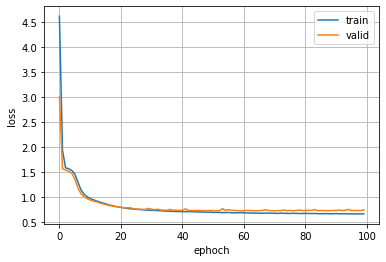

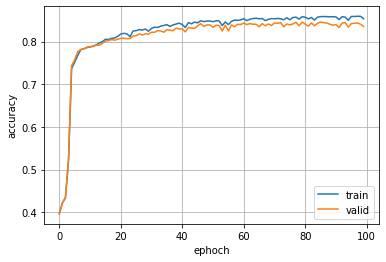

In [ ]:
plot(history['train_loss_values'], history['valid_loss_values'], epochs, 'train', 'valid', 'ephoch', 'loss')
plot(history['train_accuracy_values'], history['valid_accuracy_values'], epochs, 'train', 'valid', 'ephoch', 'accuracy')

In [ ]:
history['valid_accuracy_values'][-1]

0.8353293413173652

得られた結果から、層を増やしても大きな正答率向上とはならなかった。  
正答率向上のためにより多くの層を重ねて深層にした場合を考える。その場合、訓練データに対する適応能力、つまり細やかな部分まで覚える能力が向上する代わりに、過学習の度合いが悪化することが考察される。  
そのため次は層を深くし、バッチノーマライゼーションを実装する。  
バッチノーマライゼーションには、層を深くした場合において、学習がうまくいかなくなることを防ぐ効果がある。   
バッチノームの仲間であるレイヤーノーマライゼーションなどはTransformerでも使われており、バッチノーム系はディープラーニングにとって必要不可欠な技術になっている。



### バッチノーマライゼーションとは
ディープラーニング等で層が深くなるとうまく学習ができなくなることが起きる。そこで導入されたのがバッチノーマライゼーションである。  
処理内容は、**1ミニバッチ内の全データの同一チャネルが平均0,分散1に正規化する**こと。  
これはすなわち，”強制的”に各層のアクティベーション（活性化関数のあとの出力データ）の分布を調節している．（**データ分布の偏りを減らしている**）  
これによって，各層のアクティベーションの分布は適度な広がりを持ち，学習がスムーズに行える．

バッチノーマライゼーションを使う利点は以下の通り  
*   学習を速く進行させることができる
*   初期値にそれほど依存しない
*   過学習を抑制する（Dropoutの必要性を減らす）

#### バッチノームの弱点
以下の2つが挙げられる。
- バッチサイズが小さいと使えない 
  - 例えば極端な話バッチサイズが1だったら、正規化はできない
  - エッジコンピュータなどリソースが限られているときはバッチサイズを大きくできない点で問題になる。
- RNNなどの時系列データに使えない
  - →レイヤーノームが使われる

実は、なぜバッチノームのおかげでニューラルネットのタスクが簡単になっているかについてその明確な原因は明らかになっていない（?）。一説によると、バッチノームはチェックポイントとして働いているという説明がされている。

参考サイト：[【GIF】初心者のためのCNNからバッチノーマライゼーションとその仲間たちまでの解説](https://qiita.com/omiita/items/01855ff13cc6d3720ea4)




In [ ]:
from torch.nn import functional as F

## MultiNetの定義
## torch.nn.Moduleクラスを継承する
class MultiNet(nn.Module):
  def __init__(self, input_size, mid1_size, mid2_size, output_size):
    super(MultiNet, self).__init__()
    self.layer = nn.Linear(input_size, mid1_size) #Linearは「全結合層」を指す
    self.layer_mid1 = nn.Linear(mid1_size, mid1_size)
    self.layer_mid2 = nn.Linear(mid1_size, mid2_size)
    self.layer_output = nn.Linear(mid2_size, output_size)
    self.bn1 = nn.BatchNorm1d(mid1_size)
    self.bn2 = nn.BatchNorm1d(mid2_size)

  ## フォワードパスを定義
  def forward(self, x):
    x = F.relu(self.layer(x))
    x = F.relu(self.bn1(self.layer_mid1(x)))
    x = F.relu(self.bn2(self.layer_mid2(x)))
    x = F.relu(self.layer_output(x))
    return x


In [ ]:
## GPUの使用
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
print(device)

## モデルの定義
INPUT_FEATURES = 300  # 入力（特徴）の数： 300
OUTPUT_NEURONS = 4  # ニューロンの数： 4
MID1_SIZE = 150
MID2_SIZE = 50

model = MultiNet(INPUT_FEATURES, OUTPUT_NEURONS, MID1_SIZE, MID2_SIZE)


## 損失関数の定義（クロスエントロピー損失を使用）
criterion = nn.CrossEntropyLoss()

## オプティマイザの定義（確率的勾配降下法を使用）
optimizer  = optim.SGD(model.parameters(), lr=0.1)

## エポック数
epochs = 100

## バッチサイズ
batch_size = 256

history= train(model, ds_train, batch_size, criterion, optimizer, epochs, device=device)


cuda
エポック数 : 1, 所要時間 : 0.250sec, 学習データの平均損失 : 1.1291, 検証データの損失0.9472
学習データの正答率 : 0.7482, 検証データの正答率0.7418

エポック数 : 2, 所要時間 : 0.251sec, 学習データの平均損失 : 0.5651, 検証データの損失0.5842
学習データの正答率 : 0.8019, 検証データの正答率0.7942

エポック数 : 3, 所要時間 : 0.261sec, 学習データの平均損失 : 0.5272, 検証データの損失0.5813
学習データの正答率 : 0.7978, 検証データの正答率0.7919

エポック数 : 4, 所要時間 : 0.319sec, 学習データの平均損失 : 0.5149, 検証データの損失0.5343
学習データの正答率 : 0.8048, 検証データの正答率0.7927

エポック数 : 5, 所要時間 : 0.249sec, 学習データの平均損失 : 0.4471, 検証データの損失0.4281
学習データの正答率 : 0.8648, 検証データの正答率0.8466

エポック数 : 6, 所要時間 : 0.250sec, 学習データの平均損失 : 0.3853, 検証データの損失0.4232
学習データの正答率 : 0.8671, 検証データの正答率0.8481

エポック数 : 7, 所要時間 : 0.251sec, 学習データの平均損失 : 0.3666, 検証データの損失0.4107
学習データの正答率 : 0.8783, 検証データの正答率0.8645

エポック数 : 8, 所要時間 : 0.254sec, 学習データの平均損失 : 0.3479, 検証データの損失0.4134
学習データの正答率 : 0.8781, 検証データの正答率0.8540

エポック数 : 9, 所要時間 : 0.318sec, 学習データの平均損失 : 0.3395, 検証データの損失0.3845
学習データの正答率 : 0.8922, 検証データの正答率0.8720

エポック数 : 10, 所要時間 : 0.250sec, 学習データの平均損失 : 0.3323, 検証データの損失0.3868
学習データの正答率 : 0.8953, 検

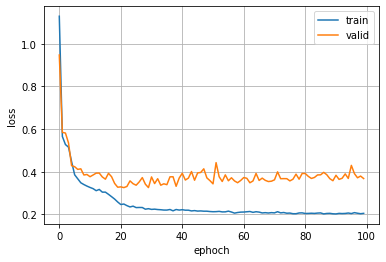

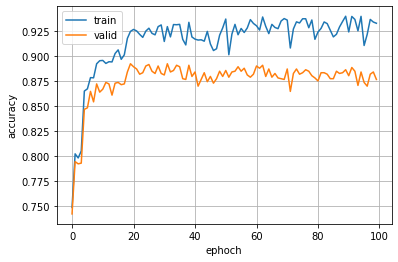

In [ ]:
plot(history['train_loss_values'], history['valid_loss_values'], epochs, 'train', 'valid', 'ephoch', 'loss')
plot(history['train_accuracy_values'], history['valid_accuracy_values'], epochs, 'train', 'valid', 'ephoch', 'accuracy')

In [ ]:
history['valid_accuracy_values'][-1]

0.8764970059880239

一つ層を増やして、バッチノーマライゼーションを実装して、学習を行ってみた。  
得られた結果から、前回の結果と比べて4%ほど正答率が向上したことが確認できる。